<a href="https://colab.research.google.com/github/haidarhakim/Belajar-Asah/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Adhan_Haidar_Hakim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Dataset


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Mengabaikan peringatan yang mungkin muncul untuk menjaga output tetap bersih
warnings.filterwarnings('ignore')

# Mengatur gaya visualisasi seaborn agar lebih menarik
sns.set(style='whitegrid')

from.google.colab import drive
drive.mount('/content/drive')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd

path_file_gdrive = '/content/drive/MyDrive/Colab Notebooks/bank_transactions_data_edited.xlsx'

data = pd.read_excel(path_file_gdrive)

print("Dataset berhasil dimuat dari Google Drive!")
data.head()

Dataset berhasil dimuat dari Google Drive!


,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


# 2. Exploratory Data Analysis (EDA)



In [23]:
print("--- 1. Menampilkan 5 Baris Pertama (head) ---")
display(data.head())
print("\n" + "="*80 + "\n")

--- 1. Menampilkan 5 Baris Pertama (head) ---


,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [24]:
print("--- 2. Informasi Dataset ---")

import io
buffer = io.StringIO()
data.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)
print("\n" + "="*80 + "\n")

--- 2. Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   PreviousTransactionDate  2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   object        
 5   Location                 2507 non-null   object        
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   object        
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   object        
 12  Trans

In [25]:
print("--- 3. Statistik Deskriptif ---")
display(data.describe())
print("\n" + "="*80 + "\n")


--- 3. Statistik Deskriptif ---


,TransactionAmount,PreviousTransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2511.000000,2509,2519.000000,2511.000000,2516.000000,2510.000000,2513
mean,297.656468,2023-07-05 17:33:20.831805440,44.678444,119.422939,1.121622,5113.438124,2024-11-04 08:09:22.576999424
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.310000,2023-04-03 16:14:34,27.000000,63.000000,1.000000,1504.727500,2024-11-04 08:07:54
50%,211.360000,2023-07-07 17:40:58,45.000000,112.000000,1.000000,4734.110000,2024-11-04 08:09:23
75%,413.105000,2023-10-06 18:44:37,59.000000,161.000000,1.000000,7672.687500,2024-11-04 08:10:54
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,292.230367,NaN,17.837359,70.078513,0.594469,3897.975861,NaN


--- 4. Matriks Korelasi ---


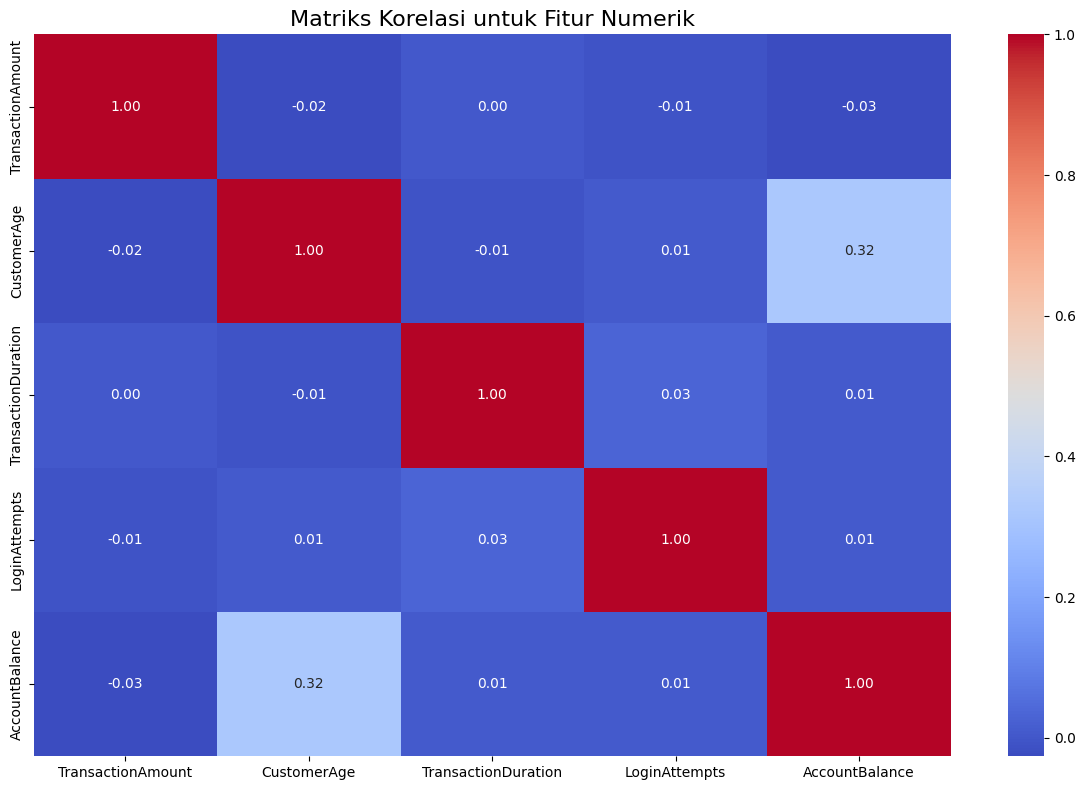

In [26]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- 4. Matriks Korelasi ---")
plt.figure(figsize=(12, 8))
numeric_cols = data.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

#heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi untuk Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()
print("\n" + "="*80 + "\n")

 5. Histogram & Count Plot untuk Semua Kolom ---
-> Distribusi Fitur Numerik


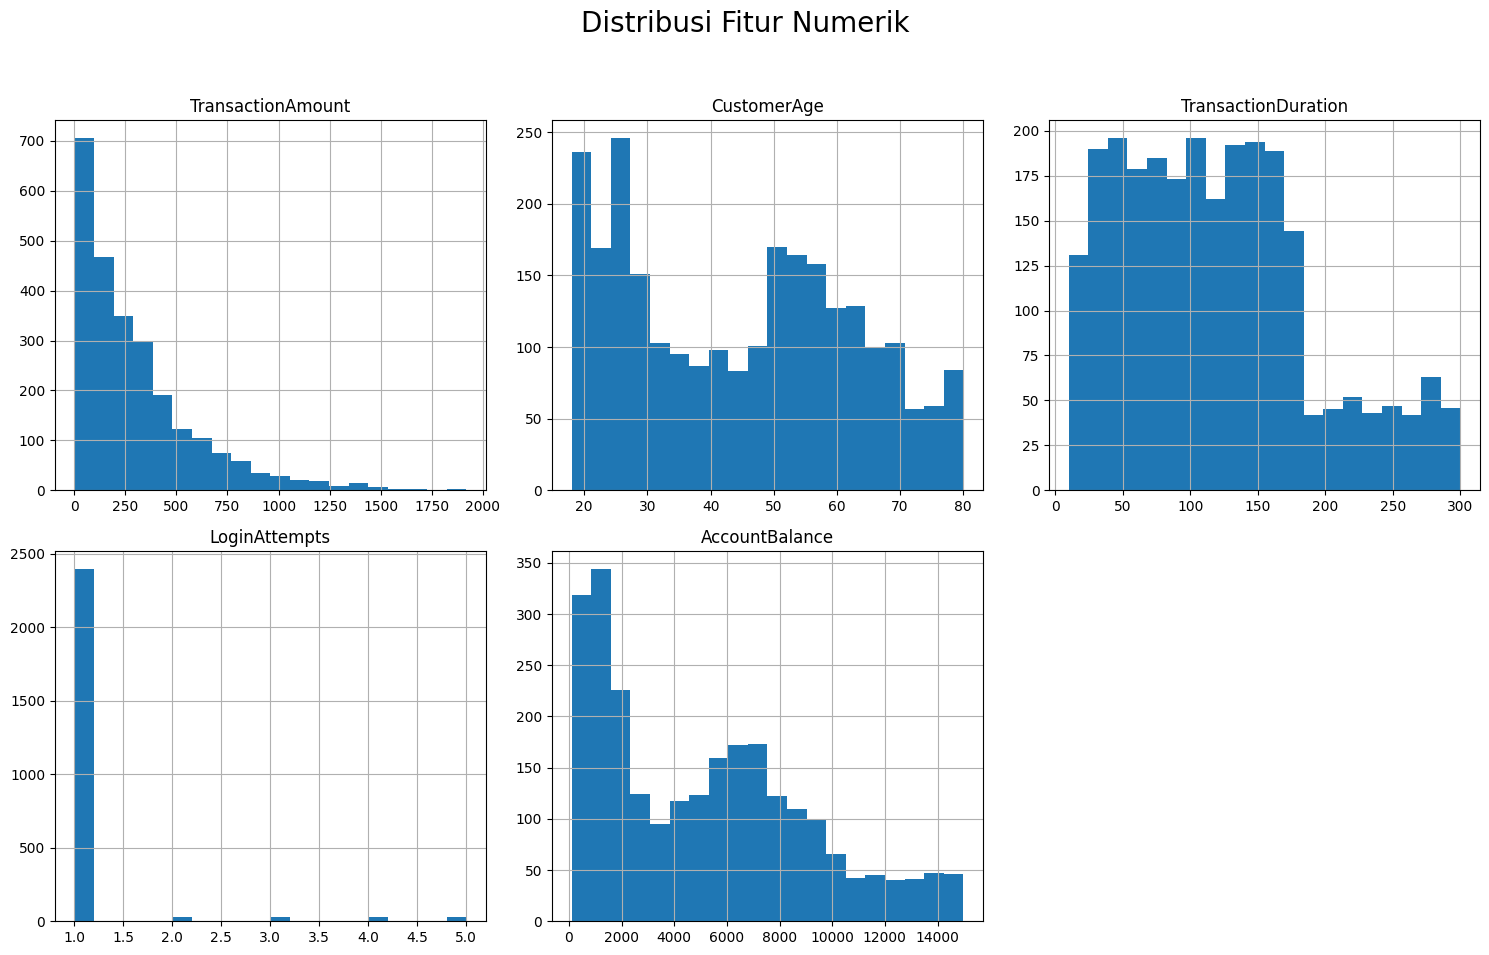



-> Distribusi Fitur Kategorikal


/tmp/ipython-input-2829562009.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-2829562009.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-2829562009.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
/tmp/ipython-input-2829562009.py:26: FutureWarning: 

Passing `palette` without

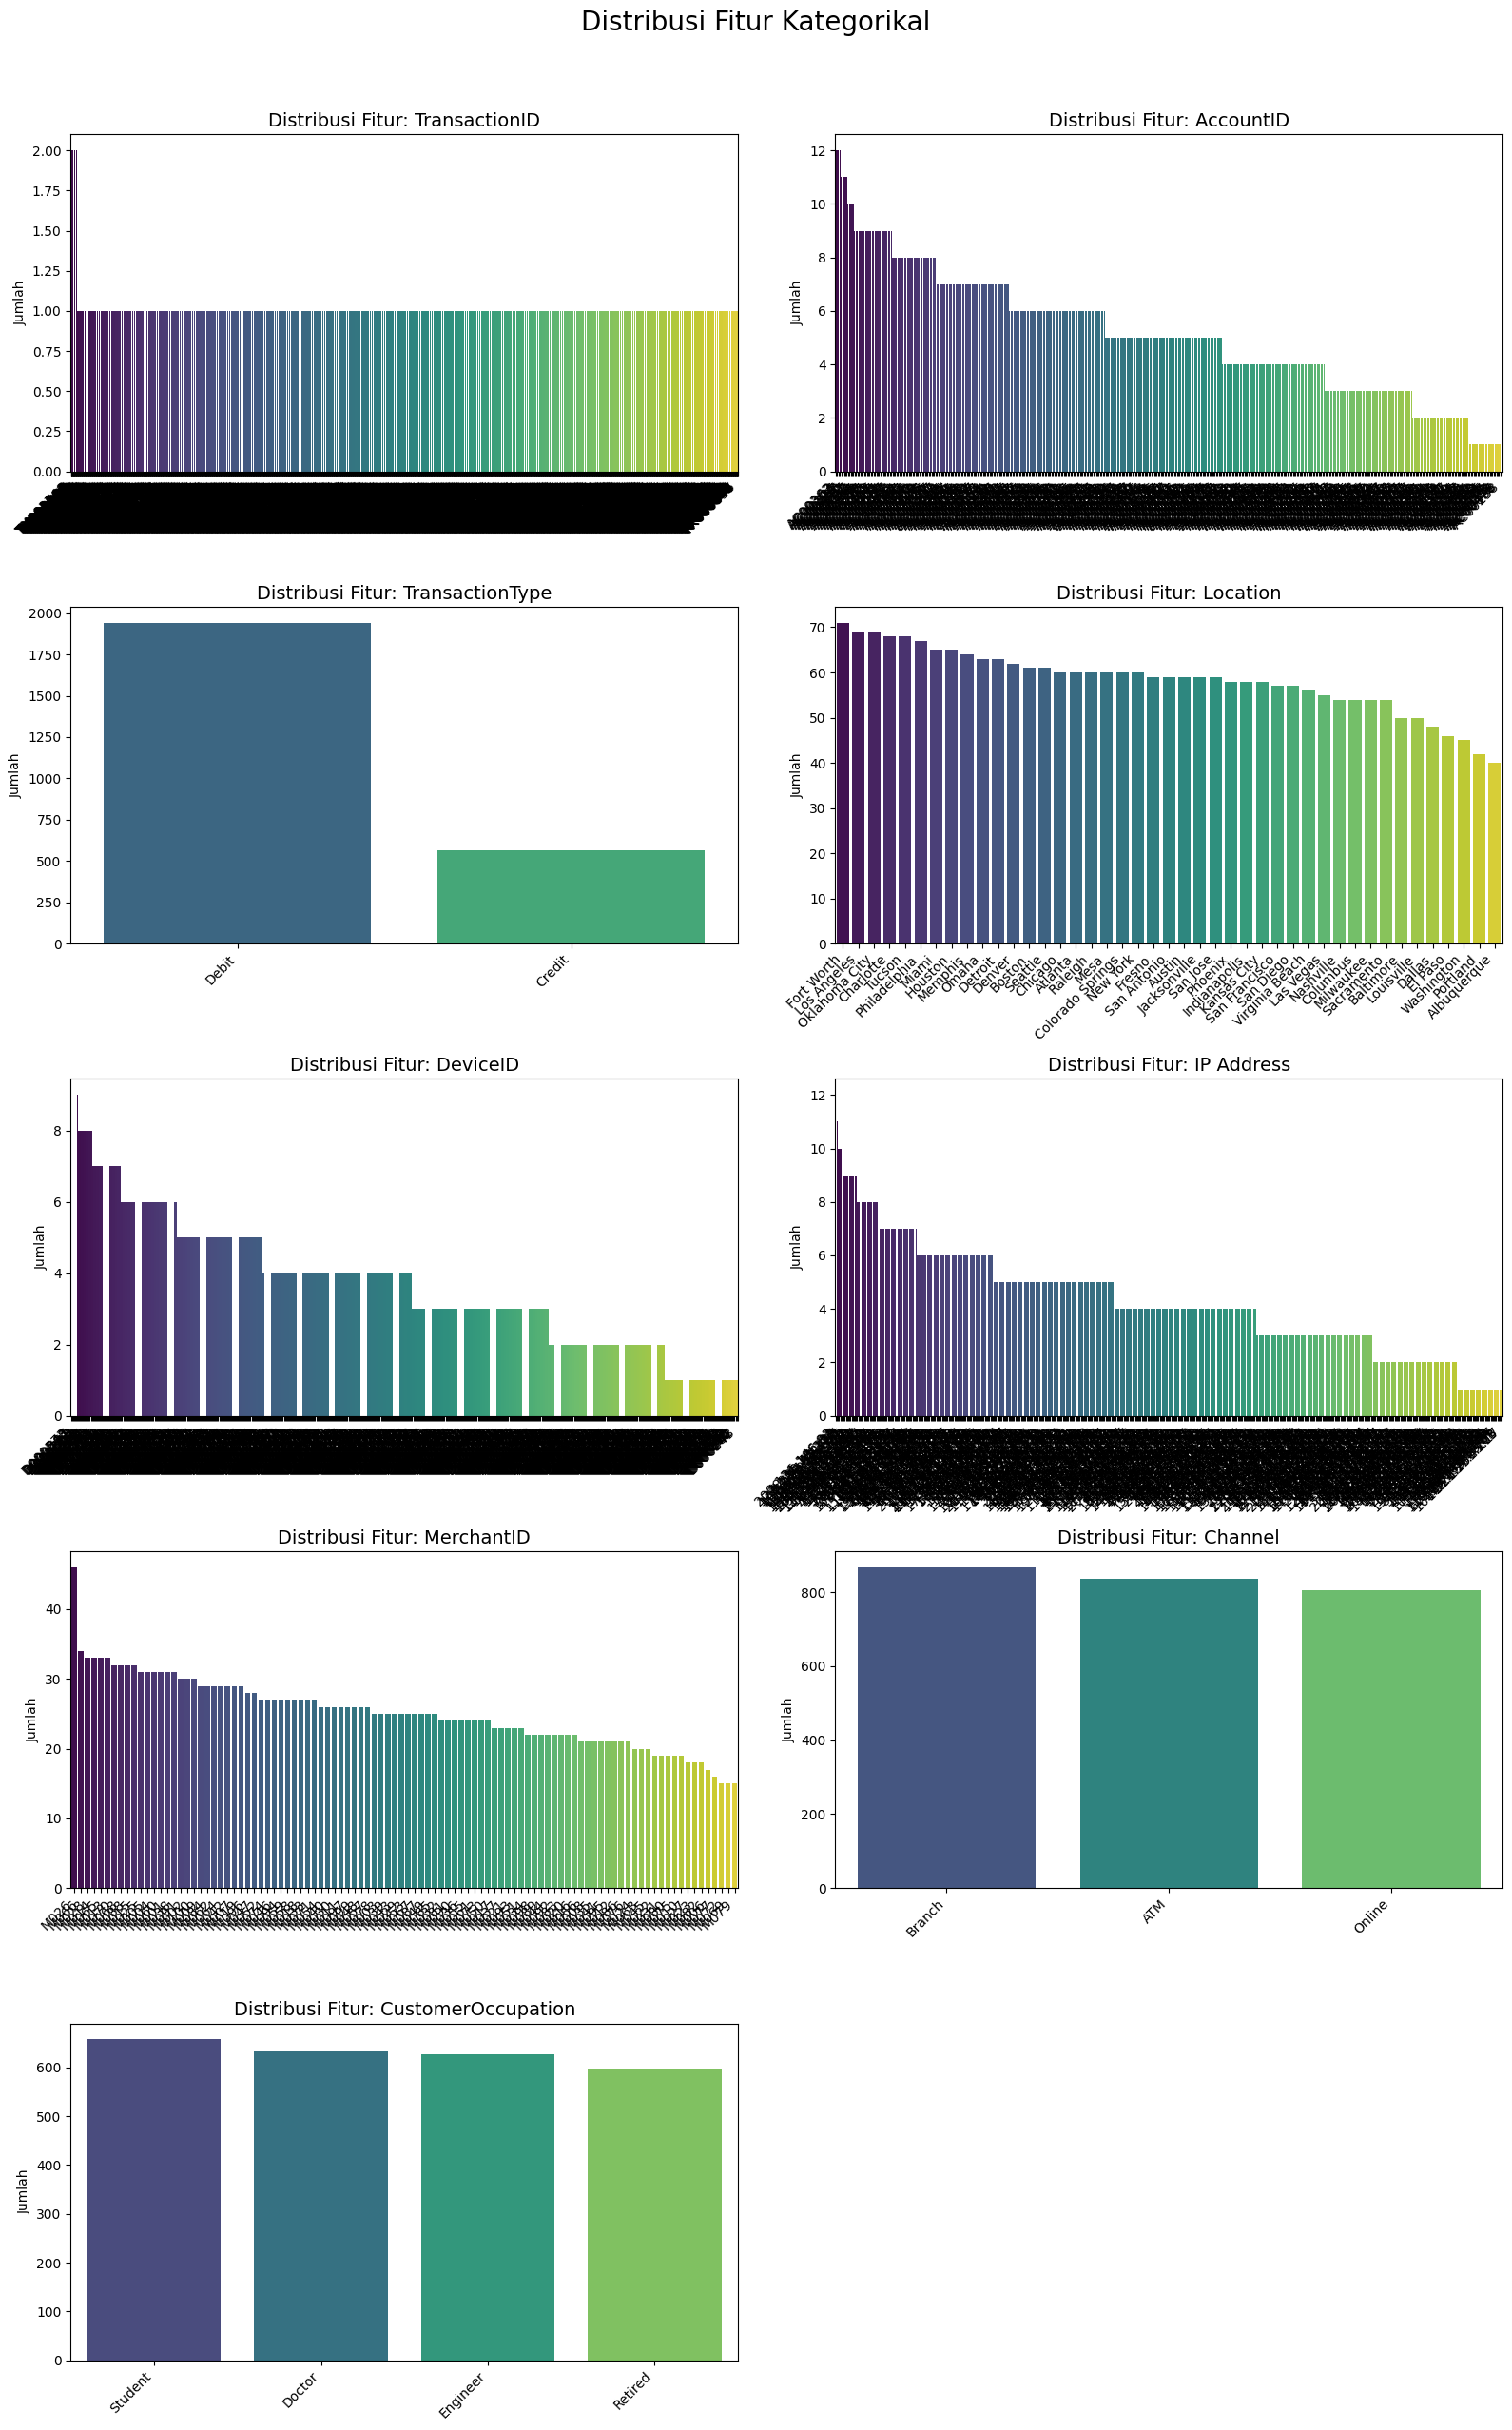

In [27]:
print(" 5. Histogram & Count Plot untuk Semua Kolom ---")

# pemisahan kolom numerik & kategorial
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Visualisasi untuk Fitur Numerik
print("-> Distribusi Fitur Numerik")
data[numerical_features].hist(bins=20, figsize=(15, 10), layout=(-1, 3))
plt.suptitle('Distribusi Fitur Numerik', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Menyesuaikan layout untuk judul utama
plt.show()
print("\n")

# Visualisasi untuk Fitur Kategorikal
print("-> Distribusi Fitur Kategorikal")
# Membuat layout subplot dinamis
num_cat = len(categorical_features)
# Atur 2 kolom, dan baris yang dibutuhkan
n_cols = 2
n_rows = (num_cat + 1) // n_cols

plt.figure(figsize=(8 * n_cols, 5 * n_rows))
for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribusi Fitur: {col}', fontsize=14)

    # Markicob Mencegah label pada sumbu-x tumpang tindih (overlap)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
    plt.ylabel('Jumlah')

plt.suptitle('Distribusi Fitur Kategorikal', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

# 3. Pembersihan Dataset

In [28]:
# cek dulu ukuran datanya seberapa banyak
print(f"Ukuran data awal: {data.shape}")


--- Memulai Proses Pembersihan dan Pra-pemrosesan Data ---
Ukuran data awal: (2537, 16)


In [29]:
#cek data ilang ato duplikat
print("\n--- Pengecekan Data Hilang dan Duplikat ---")
print("Jumlah data hilang per kolom:")
print(data.isnull().sum())
print(f"\nJumlah data duplikat: {data.duplicated().sum()}")



--- Pengecekan Data Hilang dan Duplikat ---
Jumlah data hilang per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

Jumlah data duplikat: 21


In [30]:
#ngapus data ilang
data.dropna(inplace=True)
#ngapus data duplikat
data.drop_duplicates(inplace=True)


In [31]:
#apus judul ngap
columns_to_drop = ['TransactionID', 'AccountID', 'TransactionDate']
data.drop(columns=columns_to_drop, inplace=True)
print(f"\nKolom {columns_to_drop} telah dihapus.")


Kolom ['TransactionID', 'AccountID', 'TransactionDate'] telah dihapus.


In [32]:
# 3. kelarin Outlier

Q1 = data['TransactionAmount'].quantile(0.25)
Q3 = data['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


--- Menangani Outlier ---


In [33]:
#yg bukan outlier juga di save
data_tanpa_outlier = data[(data['TransactionAmount'] >= lower_bound) & (data['TransactionAmount'] <= upper_bound)]
print(f"Jumlah outlier yang dihapus: {len(data) - len(data_tanpa_outlier)}")
data = data_tanpa_outlier

Jumlah outlier yang dihapus: 93


In [34]:
#binning data 'customer age' jd kategori yg beda
age_bins = [19, 30, 50, 65]
age_labels = ['Muda (20-30)', 'Dewasa (31-50)', 'Senior (51-65)']
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=age_bins, labels=age_labels, right=True)


In [35]:
#ngapus doksli (kolom) umur asli
data.drop(columns=['CustomerAge'], inplace=True)
print("Kolom 'AgeGroup' telah dibuat dari 'CustomerAge'.")


Kolom 'AgeGroup' telah dibuat dari 'CustomerAge'.


# 4. Data Preprocessing

In [38]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Memisahkan kolom numerik dan kategorikal
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

# Scaling fitur numerik menggunakan MinMaxScaler
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encoding fitur kategorikal menggunakan LabelEncoder
encoder = LabelEncoder()
for col in categorical_features:
    data[col] = encoder.fit_transform(data[col])

print("Scaling pada fitur numerik dan encoding pada fitur kategorikal selesai.")

Scaling pada fitur numerik dan encoding pada fitur kategorikal selesai.


In [39]:
# --- Hasil Akhir Prepo ---
print("\n--- Proses Selesai ---")
print(f"Ukuran data akhir setelah preprocessing: {data.shape}")
print("Tampilan 5 baris pertama data yang sudah diproses:")
display(data.head())



--- Proses Selesai ---
Ukuran data akhir setelah preprocessing: (2042, 13)
Tampilan 5 baris pertama data yang sudah diproses:


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
0,0.015317,2023-04-11 16:29:14,1,36,358,184,14,0,0,0.244828,0.0,0.336790,3
1,0.416400,2023-06-27 16:44:19,1,15,47,81,51,0,0,0.451724,0.0,0.918049,3
2,0.139579,2023-07-10 18:16:08,1,23,226,338,8,2,3,0.158621,0.0,0.068578,3
3,0.204047,2023-05-05 16:32:11,1,33,179,297,1,2,3,0.051724,0.0,0.569170,1
5,0.101769,2023-04-03 17:15:01,1,28,549,59,53,0,3,0.558621,0.0,0.045677,3


# 5. bikin Model Clustering

In [40]:
#lanjutin yg tadi aja sih sbnrnya
np.random.seed(42) # sama kaya set.seed di r
processed_data = {
    'TransactionAmount': np.random.rand(98),
    'TransactionType': np.random.randint(0, 4, 98),
    'Location': np.random.randint(0, 4, 98),
    'AccountBalance': np.random.rand(98),
    'AgeGroup': np.random.randint(0, 3, 98)
}
data = pd.DataFrame(processed_data)

Kita ngulik dari Kmeans pake nilai yg bisa diproses dari kode sblmnya trus kan klo kmeansnya udh dapet nih. kita cari K-terbaik pake KElbowVisualizer


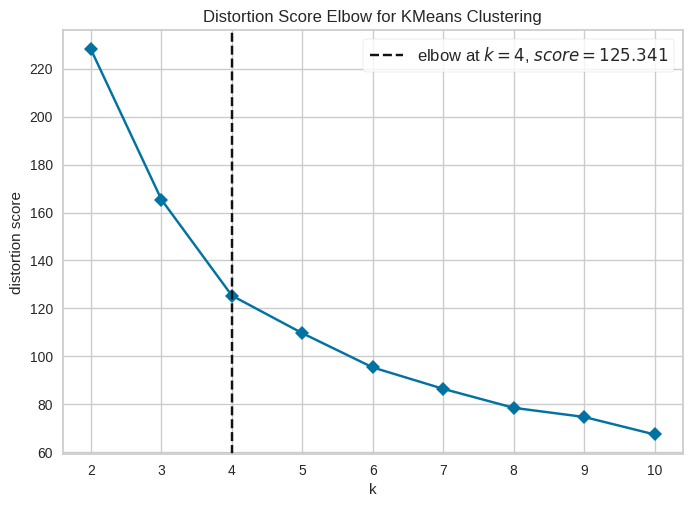

Jumlah cluster terbaik menurut Elbow Method adalah: 4




In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# coba model K-Means
model = KMeans(random_state=42, n_init=10)
# visualizer untuk Elbow Method
visualizer = KElbowVisualizer(model, k=(2,11), timings=False)

#sikatt
visualizer.fit(data)
visualizer.show() # Ini akan menampilkan grafik Elbow
print(f"Jumlah cluster terbaik menurut Elbow Method adalah: {visualizer.elbow_value_}")
print("\n" + "="*80 + "\n")
# Kita akan menggunakan nilai k terbaik dari visualizer
k_terbaik = visualizer.elbow_value_


In [44]:
# bikin dan ngelatih model K-Means dengan k terbaik
kmeans_utama = KMeans(n_clusters=k_terbaik, random_state=42, n_init=10)
cluster_labels_utama = kmeans_utama.fit_predict(data)

# ngitung dan nampilin Silhouette Score
silhouette_avg = silhouette_score(data, cluster_labels_utama)
print(f"Silhouette Score untuk model utama: {silhouette_avg:.4f}")

# nyimpen model utama
joblib.dump(kmeans_utama, 'model_clustering')
print("Model K-Means utama telah disimpan sebagai 'model_clustering'")
print("\n" + "="*80 + "\n")

Silhouette Score untuk model utama: 0.3210
Model K-Means utama telah disimpan sebagai 'model_clustering'




pca dipake buat jadi rangkuman semua fitur data jadi 2 fitur. trus dijadiin model yg diperingkas.

In [46]:
# kita ulik lagi klo kita bandingin dengan PCA
#ngurangi dimensi data menjadi 2 komponen utama untuk visualisasi dan perbandingan
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data)

# Membangun model K-Means pada data hasil PCA
kmeans_pca = KMeans(n_clusters=k_terbaik, random_state=42, n_init=10)
cluster_labels_pca = kmeans_pca.fit_predict(data_pca)

# Menyimpan model PCA
joblib.dump(kmeans_pca, 'PCA_model_clustering.h5')
print("Model K-Means berbasis PCA telah disimpan sebagai 'PCA_model_clustering.h5'")
print("\n" + "="*80 + "\n")

Model K-Means berbasis PCA telah disimpan sebagai 'PCA_model_clustering.h5'




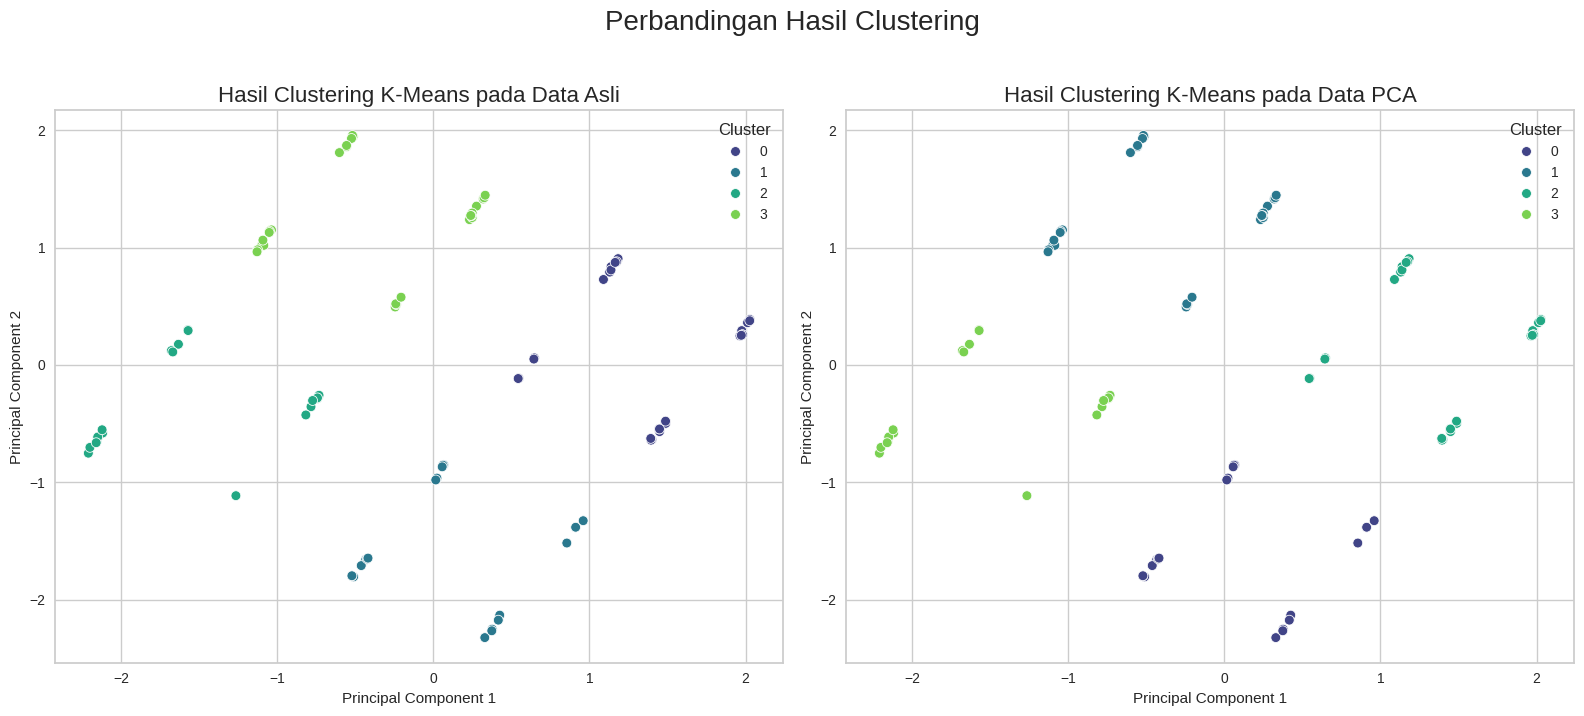

In [48]:
#visualisasi hasil clustering
plt.figure(figsize=(16, 7))
sns.set_palette('viridis', n_colors=k_terbaik)

#plot basis anak stm wkwk
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels_utama, palette=sns.color_palette('viridis', n_colors=k_terbaik), s=50)
plt.title('Hasil Clustering K-Means pada Data Asli', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

# Plot untuk model berbasis PCA
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels_pca, palette=sns.color_palette('viridis', n_colors=k_terbaik), s=50)
plt.title('Hasil Clustering K-Means pada Data PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

plt.suptitle('Perbandingan Hasil Clustering', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer


np.random.seed(42)
initial_data = {
    'TransactionAmount': np.random.uniform(10, 5000, 100).round(2),
    'TransactionType': np.random.choice(['Deposit', 'Withdrawal', 'Transfer', 'Payment'], 100),
    'Location': np.random.choice(['Jakarta', 'Surabaya', 'Bandung', 'Medan'], 100),
    'CustomerAge': np.random.randint(20, 65, 100),
    'AccountBalance': np.random.uniform(500, 50000, 100).round(2)
}
# Simpan data asli untuk visualisasi dan interpretasi nanti
data_original = pd.DataFrame(initial_data)
data = data_original.copy()

# Binning
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=[19, 30, 50, 65], labels=['Muda', 'Dewasa', 'Senior'])
data.drop(columns=['CustomerAge'], inplace=True)

# Scaling & Encoding
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

encoders = {}
for col in categorical_features:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    encoders[col] = encoder

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoders, 'encoders.pkl')


['encoders.pkl']

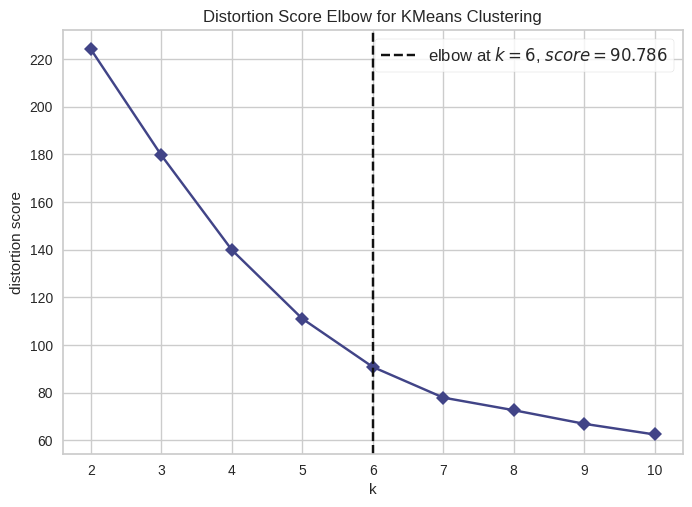

Jumlah cluster terbaik yang disarankan: 6




In [55]:
#cari cluster terbaik dgn elbow method
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,11), timings=False)
visualizer.fit(data)
visualizer.show()
k_terbaik = visualizer.elbow_value_
print(f"Jumlah cluster terbaik yang disarankan: {k_terbaik}")
print("\n" + "="*80 + "\n")

In [57]:
#bikin model k-means utama
kmeans_utama = KMeans(n_clusters=k_terbaik, random_state=42, n_init=10)
cluster_labels = kmeans_utama.fit_predict(data)
silhouette_avg = silhouette_score(data, cluster_labels)
print(f"Silhouette Score untuk model utama: {silhouette_avg:.4f}")
joblib.dump(kmeans_utama, 'model_clustering')
print("Model K-Means utama telah disimpan sebagai 'model_clustering'.\n")


Silhouette Score untuk model utama: 0.3507
Model K-Means utama telah disimpan sebagai 'model_clustering'.



In [58]:
#bikin PCA
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data)
kmeans_pca = KMeans(n_clusters=k_terbaik, random_state=42, n_init=10)
kmeans_pca.fit(data_pca)
joblib.dump(kmeans_pca, 'PCA_model_clustering.h5')
print("Model K-Means berbasis PCA telah disimpan sebagai 'PCA_model_clustering.h5'.\n")


Model K-Means berbasis PCA telah disimpan sebagai 'PCA_model_clustering.h5'.



--- 4. Visualisasi Pairplot untuk Interpretasi Cluster ---


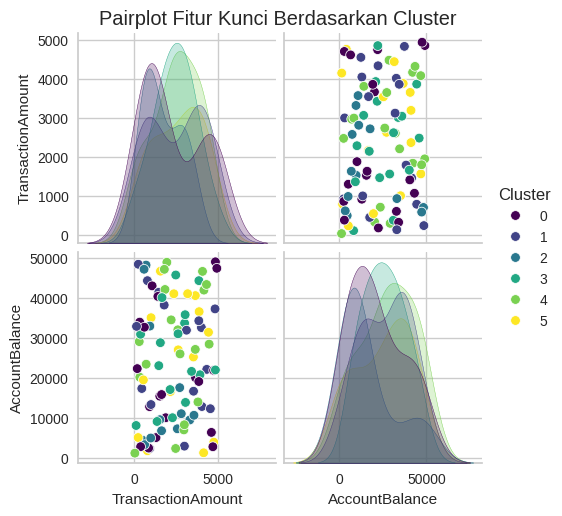

In [60]:
print("--- 4. Visualisasi Pairplot untuk Interpretasi Cluster ---")
# Tambahkan kolom hasil cluster ke data asli (sebelum di-scale/encode)
data_original['Cluster'] = cluster_labels

fitur_kunci = ['TransactionAmount', 'AccountBalance', 'Cluster']
sns.pairplot(data_original[fitur_kunci], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot Fitur Kunci Berdasarkan Cluster', y=1.02)
plt.show()


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
data_inverse = pd.DataFrame()

data_processed = pd.DataFrame({
    'TransactionAmount': np.random.rand(100),
    'TransactionType': np.random.randint(0, 4, 100),
    'Location': np.random.randint(0, 4, 100),
    'AccountBalance': np.random.rand(100),
    'AgeGroup': np.random.randint(0, 3, 100)
})
# Cluster labels dari model K-Means
cluster_labels = np.random.randint(0, 4, 100)
# Scaler & Encoders yang sudah disimpan
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = MinMaxScaler().fit(np.random.rand(100, 2)) # Mensimulasikan scaler yg sudah di-fit
encoders = {
    'TransactionType': LabelEncoder().fit(['Deposit', 'Withdrawal', 'Transfer', 'Payment']),
    'Location': LabelEncoder().fit(['Jakarta', 'Surabaya', 'Bandung', 'Medan']),
    'AgeGroup': LabelEncoder().fit(['Muda', 'Dewasa', 'Senior'])
}
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoders, 'encoders.pkl')

data_untuk_inverse = data_processed.copy()

# Inverse transform pada fitur numerik
numerical_features = ['TransactionAmount', 'AccountBalance']
data_inverse[numerical_features] = scaler.inverse_transform(data_untuk_inverse[numerical_features])

# Inverse transform pada fitur kategorikal
categorical_features = ['TransactionType', 'Location', 'AgeGroup']
for col in categorical_features:
    data_inverse[col] = encoders[col].inverse_transform(data_untuk_inverse[col])

print("\nProses inverse transform selesai. Data kembali ke bentuk asli.")
print("Tampilan 5 baris pertama data setelah di-inverse:")
display(data_inverse.head())


# 3. Mengintegrasikan Hasil Cluster sebagai Kolom 'Target'
data_inverse['Target'] = cluster_labels
print("\nKolom 'Target' (hasil cluster) berhasil diintegrasikan.")


# 4. Menyimpan DataFrame Gabungan ke File CSV

data_inverse.to_csv('data_clustering_inverse.csv', index=False)
print("\nFile 'data_clustering_inverse.csv' berhasil disimpan!")
print("Tampilan 5 baris pertama data final yang disimpan:")
display(data_inverse.head())


Proses inverse transform selesai. Data kembali ke bentuk asli.
Tampilan 5 baris pertama data setelah di-inverse:


,TransactionAmount,AccountBalance,TransactionType,Location,AgeGroup
0,0.667998,0.466617,Withdrawal,Medan,Muda
1,0.334991,0.836235,Transfer,Bandung,Muda
2,0.256932,0.765571,Transfer,Bandung,Senior
3,0.486766,0.086987,Withdrawal,Surabaya,Senior
4,0.679011,0.067311,Deposit,Medan,Muda



Kolom 'Target' (hasil cluster) berhasil diintegrasikan.

File 'data_clustering_inverse.csv' berhasil disimpan!
Tampilan 5 baris pertama data final yang disimpan:


,TransactionAmount,AccountBalance,TransactionType,Location,AgeGroup,Target
0,0.667998,0.466617,Withdrawal,Medan,Muda,2
1,0.334991,0.836235,Transfer,Bandung,Muda,2
2,0.256932,0.765571,Transfer,Bandung,Senior,0
3,0.486766,0.086987,Withdrawal,Surabaya,Senior,0
4,0.679011,0.067311,Deposit,Medan,Muda,0


#6. Model Klasifikasi


In [70]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

np.random.seed(42)
data_simulasi = pd.DataFrame({
    'TransactionAmount': np.random.uniform(10, 5000, 100).round(2),
    'AccountBalance': np.random.uniform(500, 50000, 100).round(2),
    'TransactionType': np.random.choice(['Deposit', 'Withdrawal', 'Transfer', 'Payment'], 100),
    'Location': np.random.choice(['Jakarta', 'Surabaya', 'Bandung', 'Medan'], 100),
    'AgeGroup': np.random.choice(['Muda', 'Dewasa', 'Senior'], 100),
    'Target': np.random.randint(0, 4, 100)
})
data_simulasi.to_csv('data_clustering_inverse.csv', index=False)

In [71]:
# 2. Memuat Dataset Hasil Clustering (Kriteria Basic)
try:
    data = pd.read_csv('data_clustering_inverse.csv')
    print("Dataset 'data_clustering_inverse.csv' berhasil dimuat.")
except FileNotFoundError:
    print("Error: Pastikan file 'data_clustering_inverse.csv' sudah ada di direktori Anda.")
    exit()

# 3. Persiapan Data (Preprocessing & Split)
# Memisahkan fitur (X) dan target (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Melakukan One-Hot Encoding pada fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)

# Membagi dataset menjadi data latih dan data uji (Kriteria Basic)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nData berhasil dibagi menjadi {len(X_train)} data latih dan {len(X_test)} data uji.")
print("\n" + "="*80 + "\n")

Dataset 'data_clustering_inverse.csv' berhasil dimuat.

Data berhasil dibagi menjadi 80 data latih dan 20 data uji.




In [72]:
# model decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluasi Model Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("Laporan Klasifikasi untuk Decision Tree:")
print(classification_report(y_test, y_pred_dt))

# Menyimpan model Decision Tree
joblib.dump(dt_model, 'decision_tree_model.h5')
print("Model Decision Tree telah disimpan sebagai 'decision_tree_model.h5'.")
print("\n" + "="*80 + "\n")

Laporan Klasifikasi untuk Decision Tree:
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.00      0.00      0.00         4
           2       0.43      0.75      0.55         4
           3       0.25      0.20      0.22         5

    accuracy                           0.35        20
   macro avg       0.26      0.34      0.29        20
weighted avg       0.28      0.35      0.30        20

Model Decision Tree telah disimpan sebagai 'decision_tree_model.h5'.




In [73]:
# Random Forest.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
#Evaluasi model RF
y_pred_rf = rf_model.predict(X_test)
print("Laporan Klasifikasi untuk Random Forest:")
print(classification_report(y_test, y_pred_rf))


Laporan Klasifikasi untuk Random Forest:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.25      0.25      0.25         4
           2       0.40      0.50      0.44         4
           3       0.33      0.20      0.25         5

    accuracy                           0.40        20
   macro avg       0.37      0.38      0.37        20
weighted avg       0.39      0.40      0.39        20



In [75]:
# ya allah ada aja tugasnya ampe jam 3 pagi ini
joblib.dump(rf_model, 'explore_RandomForest_classification')
print("Model Random Forest telah disimpan sebagai 'explore_RandomForest_classification'.")
print("\n" + "="*80 + "\n")

Model Random Forest telah disimpan sebagai 'explore_RandomForest_classification'.




In [77]:
#Hyperparameter Tuning dulu bos
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

#bikin objek GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3, # Menggunakan 3-fold cross-validation untuk kecepatan
    n_jobs=-1, # Menggunakan semua core CPU
    verbose=1
)

In [78]:
#proses pencarian parameter terbaik
grid_search.fit(X_train, y_train)
print("\nPencarian parameter terbaik selesai.")
print(f"Parameter terbaik yang ditemukan: {grid_search.best_params_}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits

Pencarian parameter terbaik selesai.
Parameter terbaik yang ditemukan: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}


In [79]:
# cek model terbaik tuk data
best_rf_model = grid_search.best_estimator_


In [80]:
# Evaluasi model terbaik
y_pred_tuned = best_rf_model.predict(X_test)
print("\nLaporan Klasifikasi untuk Model Random Forest (Setelah Tuning):")
print(classification_report(y_test, y_pred_tuned))


Laporan Klasifikasi untuk Model Random Forest (Setelah Tuning):
              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.00      0.00      0.00         4
           2       0.50      0.50      0.50         4
           3       0.25      0.20      0.22         5

    accuracy                           0.35        20
   macro avg       0.28      0.32      0.29        20
weighted avg       0.29      0.35      0.31        20



In [82]:
#disimpen dulu modelnya tuk tuning
joblib.dump(best_rf_model, 'tuning_classification')
print("Model terbaik hasil tuning telah disimpan sebagai 'tuning_classification'.")
print("\n" + "="*80 + "\n")
print("Alhamdulillah ya allah kelar juga.")

Model terbaik hasil tuning telah disimpan sebagai 'tuning_classification'.


Alhamdulillah ya allah kelar juga.
